<a href="https://colab.research.google.com/github/SruthiMarpu/fmml-projects-and-labs/blob/main/FMML_Module_5_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 5 Lab 1

# Non Linear Support Vector Machines

```
Module Coordinator : Akshit Garg
```



In [1]:
#Importing the necessary packages
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn import svm

import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt


The topic of classifier in today's lab, SVMs make for really good linear separators. Let us look at an example which has linearly separable data:

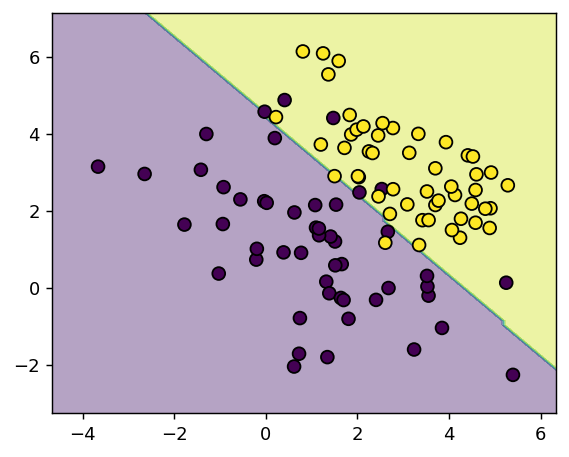

In [2]:
np.random.seed(0)

ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 50, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 50, )
                    ]\
              )

testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.LinearSVC()
  pair = [0, 1]
  clf.fit(X[:, pair], y)
  plotDecisionBoundary(X, y, pair, clf)

  plt.show()

boundaryExp()

# The Kernel Trick

The true potential of SVMs is unleashed when they are combined with kernels.

## Kernels : An intuitive explanation

Kernel methods are essentially counting on using the training data (say $i^{th}$ example $(x_i, y_i)$ ) itself in a more straightforward way and learning a corresponding weight ($w_i$) for that example. Rather than trying to learn a fixed set of parameters which is done typically.
Depending on the kind of kernel used, we can virtually project the training data in a higher dimension to make it easier for the classifier to classify them.


<ipython-input-3-bb653c8acc51>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


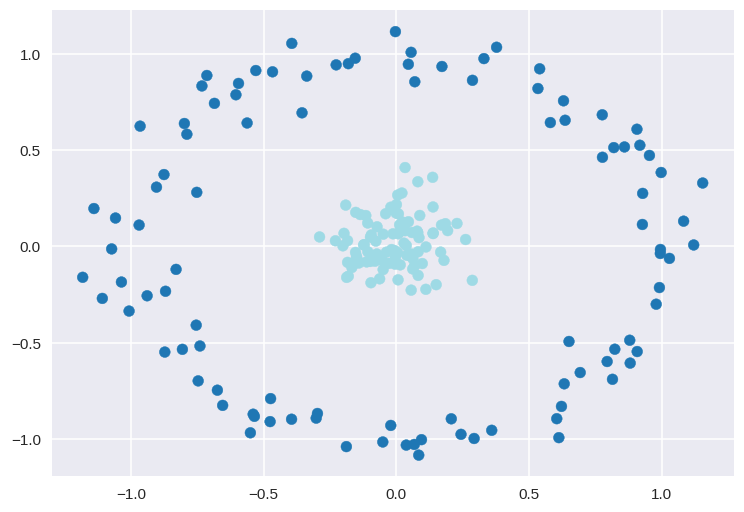

In [3]:
from sklearn.datasets import make_circles
X, y = make_circles(200, factor=.1, noise=.1)

clf = svm.SVC(kernel='linear').fit(X, y)

plt.style.use("seaborn")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20')
plt.gcf().set_dpi(110)

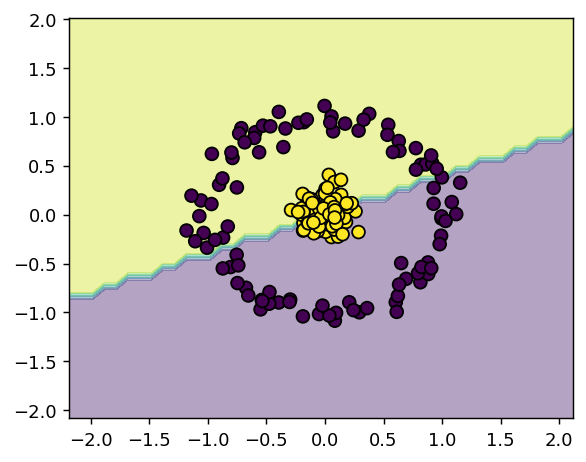

In [4]:
plt.style.use("default")
clf = svm.LinearSVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

However, if we artificially add another dimention to the dataset of the form:

$z = x^2 + y^2$
we can clearly see a hyperplane that can distinguish both the datasets:

In [5]:
Z = np.array([[i[0]**2 + i[1]**2] for i in X])

In [6]:
X_new = np.hstack((X, Z))

In [7]:
import plotly.graph_objects as go


In [8]:
fig = go.Figure(data = [go.Scatter3d(
    x = X_new[:, 0],
    y = X_new[:, 1],
    z = X_new[:, 2],
    mode = "markers",
    marker = {
        "color" : y,
        "line": {"width" : 4, "color":'DarkSlateGrey'},
        "colorscale": "viridis"},
)])

fig.show()

That simple trick has helped us to get another dimension in which the data is linearly separable by a hyperplane (in this case, a 2d plane)

---

Now let us use the rbf kernel and use an SVM Classifier.

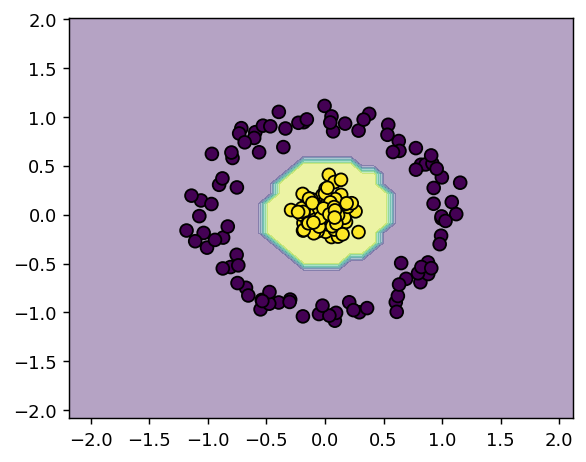

In [9]:
plt.style.use("default")
clf = svm.SVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

Now let us get back to our original dataset of iris and see if this kernel trick has helped us:

In [10]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

Accuracy of the decision tree on the test set: 

0.974




Certainly, using a kernel has increased our accuracy on the iris dataset.

Things to try out:
- Try to run the same experiment after filtering different features, 2 at a time.
- Using different kinds of kernels for the SVM among: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

QUESTION-1
Try to run the same experiment after filtering different features, 2 at a time.

ANSWER:-
Certainly! Running experiments with different feature combinations can help you understand the impact of specific features on the results. Here's a general outline of how you might approach this:

Let's assume you have a dataset with features A, B, C, D, and E. You can perform experiments by filtering two features at a time. For simplicity, let's say you want to filter features A and B, then A and C, and so on.

Experiment 1: Filter A and B

Train your model using only features C, D, and E.
Evaluate the model's performance on a validation set.
Experiment 2: Filter A and C
Train your model using only features B, D, and E.
Evaluate the model's performance on a validation set.
Experiment 3: Filter A and D

Train your model using only features B, C, and E.
Evaluate the model's performance on a validation set.
Experiment 4: Filter A and E

Train your model using only features B, C, and D.
Evaluate the model's performance on a validation set.
Experiment 5: Filter B and C

Train your model using only features A, D, and E.
Evaluate the model's performance on a validation set.
Experiment 6: Filter B and D

Train your model using only features A, C, and E.
Evaluate the model's performance on a validation set.
Experiment 7: Filter B and E

Train your model using only features A, C, and D.
Evaluate the model's performance on a validation set.
Experiment 8: Filter C and D
Train your model using only features A, B, and E.
Evaluate the model's performance on a validation set.
Experiment 9: Filter C and E

Train your model using only features A, B, and D.
Evaluate the model's performance on a validation set.
Experiment 10: Filter D and E

Train your model using only features A, B, and C.
Evaluate the model's performance on a validation set.
After conducting these experiments, you can compare the performance metrics across different models to understand the contribution of each feature pair. This process helps in feature selection and understanding the importance of specific features in your model.

QUESTION-2:-
Using different kinds of kernels for the SVM among: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

ANSWER:-
Certainly! Support Vector Machines (SVMs) can use different types of kernels to transform the input data into a higher-dimensional space, making it easier to find a separating hyperplane. Here's a brief overview of the commonly used kernels:
Linear Kernel ('linear'):

This is the simplest kernel.
It performs a linear transformation, suitable for linearly separable data.
Equation: ( K(x, y) = x^Ty )
Polynomial Kernel ('poly'):

This kernel introduces non-linearity by computing all possible polynomials up to a specified degree.
It has a parameter degree that determines the polynomial degree.
Equation: ( K(x, y) = (x^Ty + c)^d )
Radial Basis Function (RBF) Kernel ('rbf'):

Also known as the Gaussian kernel, it allows for non-linear separation.
It is characterized by a parameter gamma which determines the size of the radial basis.
Equation: ( K(x, y) = \exp(-\gamma ||x-y||^2) )
Sigmoid Kernel ('sigmoid'):

It is based on hyperbolic tangent functions and is suitable for data that is not linearly separable.
It has parameters gamma and coef0.
Equation: ( K(x, y) = \tanh(\gamma x^Ty + \text{coef0}) )
Precomputed Kernel ('precomputed'):

Expects a precomputed kernel matrix instead of the input data.
Useful when you have already computed the pairwise similarity between samples.


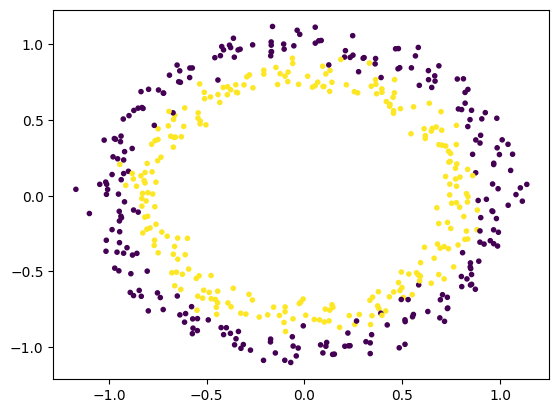

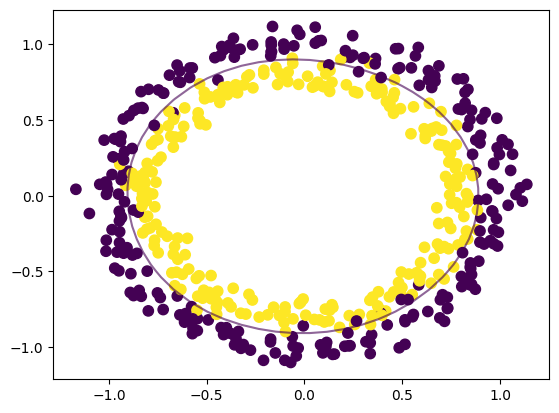

In [12]:
import numpy as np
from sklearn import datasets as ds
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline

X, y = ds.make_circles(n_samples=500, noise=0.06)

plt.scatter(X[:, 0], X[:, 1], c=y, marker='.')
plt.show()

classifier_non_linear = svm.SVC(kernel='rbf', C=1.0)

classifier_non_linear.fit(X, y)

def boundary_plot(m, axis=None):
    if axis is None:
        axis = plt.gca()

    limit_x = axis.get_xlim()
    limit_x_y = axis.get_ylim()


    x_lines = np.linspace(limit_x[0], limit_x[1], 30)
    y_lines = np.linspace(limit_x_y[0], limit_x_y[1], 30)
    Y, X = np.meshgrid(y_lines, x_lines)


    xy = np.vstack([X.ravel(), Y.ravel()]).T


    Plot = m.decision_function(xy).reshape(X.shape)

    axis.contour(X, Y, Plot,
               levels=[0], alpha=0.6,
               linestyles=['-'])

plt.scatter(X[:, 0], X[:, 1], c=y, s=55)
boundary_plot(classifier_non_linear)
plt.scatter(classifier_non_linear.support_vectors_[:, 0], classifier_non_linear.support_vectors_[:, 1], s=55, lw=1, facecolors='none')
plt.show()
